In [1]:
NAME = "DUCROCQ Romain"

# DUCROCQ Romain

# Python Data Analysis - Final project

In [2]:
%matplotlib inline
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import os

In [3]:
pd.set_option('display.max_colwidth', None, "display.max_rows", None, "display.max_columns", None)
pd.options.mode.chained_assignment = None

## 1 - Random data

- What information can we get from the application dataset ?

In [4]:
HomeCredit_columns_description = pd.read_csv('data/HomeCredit_columns_description.csv',sep = ',',encoding= 'unicode_escape', index_col=0)

In [5]:
HomeCredit_columns_description[(HomeCredit_columns_description.Table == "application_{train|test}.csv")]

,Table,Row,Description,Special
1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
2,application_{train|test}.csv,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",NaN
5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
8,application_{train|test}.csv,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
9,application_{train|test}.csv,CNT_CHILDREN,Number of children the client has,NaN
10,application_{train|test}.csv,AMT_INCOME_TOTAL,Income of the client,NaN
11,application_{train|test}.csv,AMT_CREDIT,Credit amount of the loan,NaN
12,application_{train|test}.csv,AMT_ANNUITY,Loan annuity,NaN


In [6]:
application = pd.read_csv('data/application_train.csv',sep = ',')

- We begin by observing the proportions of variables in columns of interest as percentages:
> i.e. for TARGET = 1

In [7]:
def payment_difficulties_percentage_by_column(column):
    return application[application.TARGET == 1]. \
    groupby(column)['SK_ID_CURR']. \
    count(). \
    reset_index(name='Percentage'). \
    sort_values(['Percentage'], ascending=False). \
    set_index(column). \
    apply(lambda Percentage: 100 * Percentage / float(Percentage.sum())). \
    round({'Percentage': 2})

- By contract type:

In [8]:
payment_difficulties_percentage_by_column('NAME_CONTRACT_TYPE')

,Percentage
NAME_CONTRACT_TYPE,
Cash loans,93.54
Revolving loans,6.46


- Or by education:

In [9]:
payment_difficulties_percentage_by_column('NAME_EDUCATION_TYPE')

,Percentage
NAME_EDUCATION_TYPE,
Secondary / secondary special,78.65
Higher education,16.15
Incomplete higher,3.51
Lower secondary,1.68
Academic degree,0.01


> The majority of clients with payment difficulties have either a cash loan and / or a secondary education.

- And we also display them in a pie chart and a table:

In [10]:
def display_payment_difficulties_percentage_by_column(column):
    df = payment_difficulties_percentage_by_column(column)

    fig = plt.figure(figsize=(20,10))
    fig.suptitle(f'Payment difficulties by: {column}', fontsize=24)

    ax1 = fig.add_subplot(121)
    ax1.pie(df.Percentage, labels=df.index.values, autopct='%1.1f%%')

    ax2 = fig.add_subplot(122)
    ax2.axis('tight')
    ax2.axis('off')
    df_table = ax2.table(
        cellText=[[index,(str(row[0])+'%')] for index, row in df.iterrows()], 
        colLabels=(column, "Percentage"),
        bbox=[0, 0, 1, 1],
        loc='center'
    )
    df_table.auto_set_font_size(False)
    df_table.set_fontsize(18)

    plt.show()

- By family status:

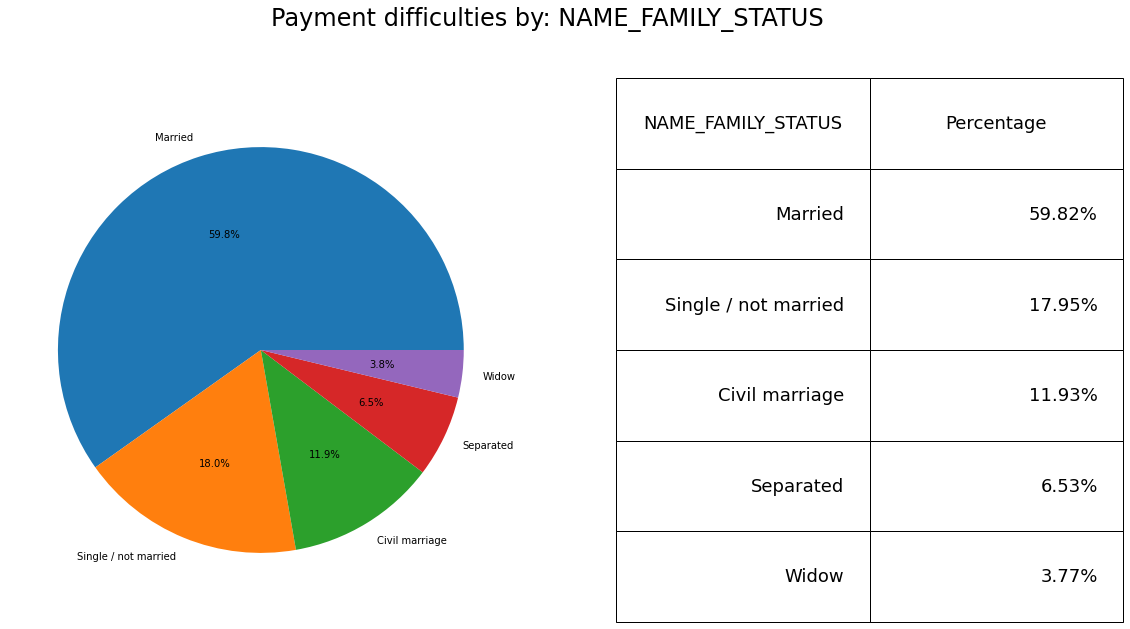

In [11]:
display_payment_difficulties_percentage_by_column('NAME_FAMILY_STATUS')

- Or by housing type:

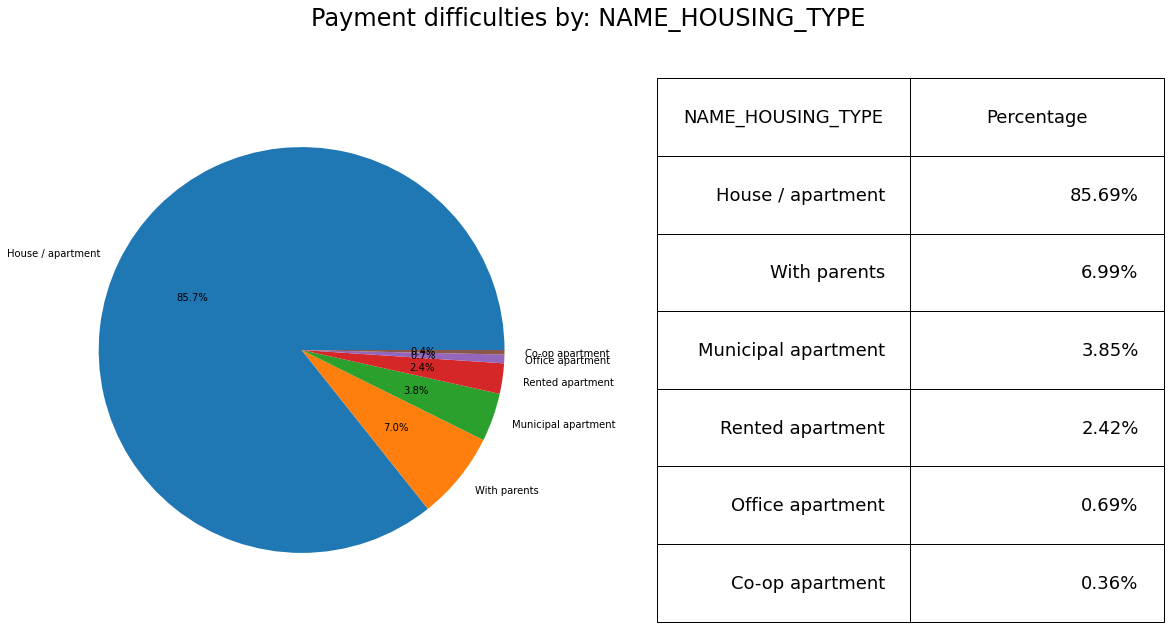

In [12]:
display_payment_difficulties_percentage_by_column('NAME_HOUSING_TYPE')

> The majority of clients with payment difficulties are either living in a house / apartment and / or are married.

## 2 - Establishing a profile

- We look at the correlation between payment difficulties and criteria, and take the top 5:

In [13]:
top_5_payment_difficulties_criteria = application.corr()['TARGET'].sort_values(ascending=False).head(6)[1:]
top_5_payment_difficulties_criteria

DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
Name: TARGET, dtype: float64

- And plot them in a horizontal bar chart:

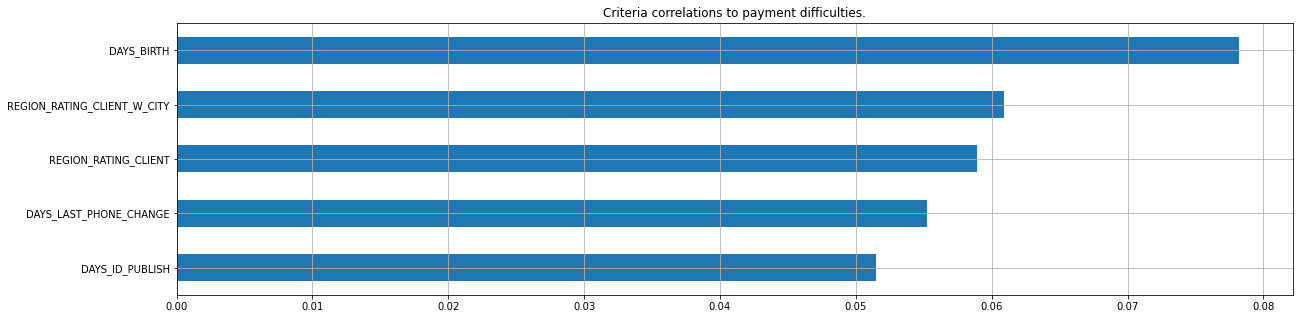

In [14]:
top_5_payment_difficulties_criteria.sort_values().plot(
    kind="barh",
    grid="true",
    figsize=(20,5),
    title="Criteria correlations to payment difficulties."
)
None

> We can see that the most related criterion is age, and then the region.

- Now, we make a function to find the head value with payment difficulties in a column:

In [15]:
def payment_difficulties_profile_by_column(column):
    df = pd.DataFrame({
    'Profile': \
        application[application.TARGET == 1]. \
        groupby(column)['SK_ID_CURR']. \
        count(). \
        reset_index(name='count'). \
        sort_values(['count'], ascending=False). \
        head(1) \
        [column]
    })
    df.index = [column]
    return df

- And apply it to the 5 top criteria for payment difficulties:

In [16]:
payment_difficulties_profile = pd.concat(
    [payment_difficulties_profile_by_column(index) for index in top_5_payment_difficulties_criteria.index]
)
payment_difficulties_profile

,Profile
DAYS_BIRTH,-11566.0
REGION_RATING_CLIENT_W_CITY,2.0
REGION_RATING_CLIENT,2.0
DAYS_LAST_PHONE_CHANGE,0.0
DAYS_ID_PUBLISH,-4033.0


> The profile having the most likely payment difficulties is a 31 year old applicant, living in a region and city with moderate scores, that never changed his phone and changed his IDs 11 years ago for the last time.

> However, such an artificially constructed profile doesn't make any sense, so let's look at the top criterion: age.

## 3 - Age and age range distributions

- First, we create a column with the age in year:

In [17]:
payment_difficulties = application[application.TARGET == 1]
payment_difficulties['AGE'] = payment_difficulties['DAYS_BIRTH'] / -365
payment_difficulties = payment_difficulties.round({'AGE': 0})
payment_difficulties['AGE'].head(10)

0      26.0
26     51.0
40     48.0
42     37.0
81     68.0
94     28.0
110    29.0
138    46.0
154    48.0
163    22.0
Name: AGE, dtype: float64

- And we plot the age distribution for payment difficulties:

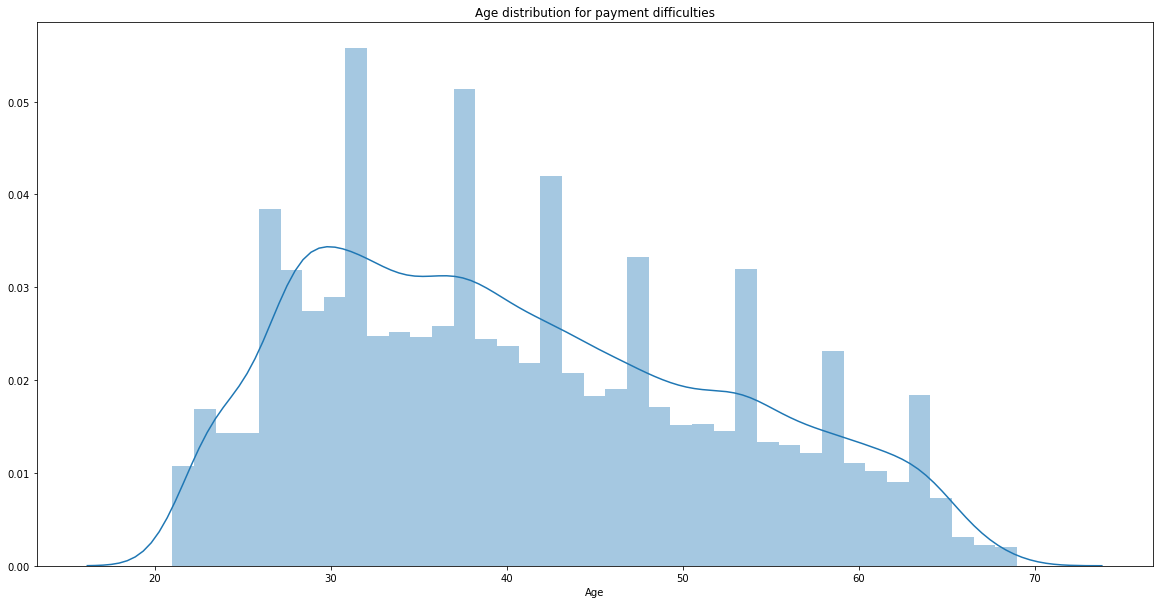

In [18]:
plt.figure(figsize=(20, 10))
plt.title('Age distribution for payment difficulties')
sns.distplot(payment_difficulties['AGE'], axlabel="Age")
None

> We see that the clients around 30 years old are the ones with the most payment difficulties.

- And if we look by age ranges:

In [19]:
payment_difficulties['AGE_RANGE'] = (payment_difficulties['AGE']/10).astype(int)*10

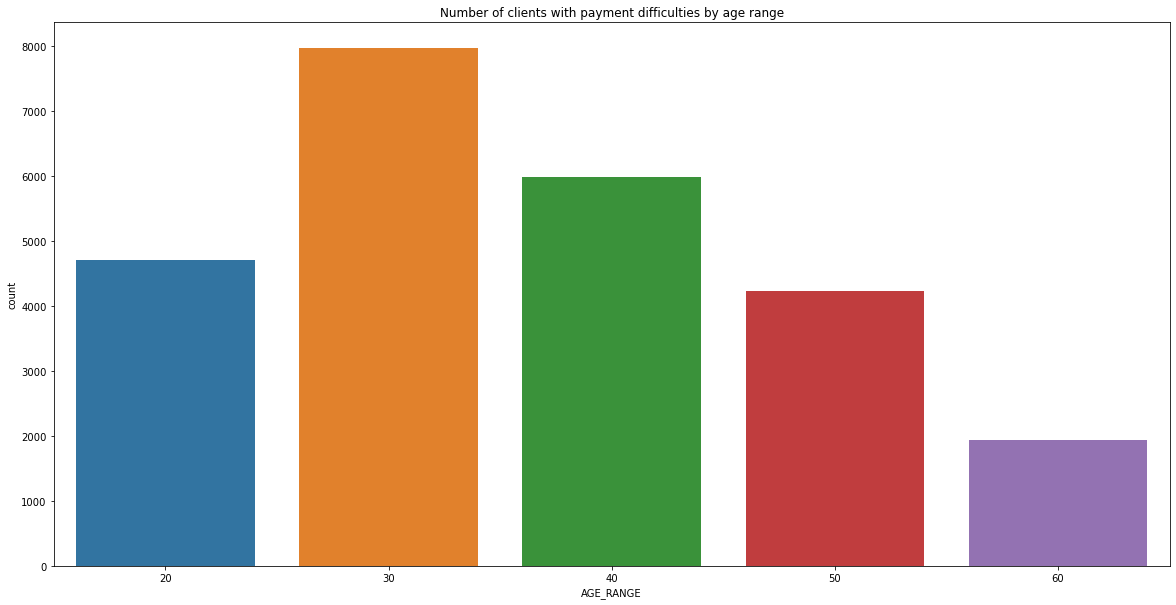

In [20]:
plt.figure(figsize=(20, 10))
sns.countplot(x="AGE_RANGE", data=payment_difficulties)
plt.title("Number of clients with payment difficulties by age range")
None

> The clients around 30 to 40 years old are the ones with the most payment difficulties.

## 4 - Credit type and debt

- What about the bureau ?

In [21]:
HomeCredit_columns_description[(HomeCredit_columns_description.Table == "bureau.csv")]

,Table,Row,Description,Special
125,bureau.csv,SK_ID_CURR,"ID of loan in our sample - one loan in our sample can have 0,1,2 or more related previous credits in credit bureau",hashed
126,bureau.csv,SK_BUREAU_ID,Recoded ID of previous Credit Bureau credit related to our loan (unique coding for each loan application),hashed
127,bureau.csv,CREDIT_ACTIVE,Status of the Credit Bureau (CB) reported credits,NaN
128,bureau.csv,CREDIT_CURRENCY,Recoded currency of the Credit Bureau credit,recoded
129,bureau.csv,DAYS_CREDIT,How many days before current application did client apply for Credit Bureau credit,time only relative to the application
130,bureau.csv,CREDIT_DAY_OVERDUE,Number of days past due on CB credit at the time of application for related loan in our sample,NaN
131,bureau.csv,DAYS_CREDIT_ENDDATE,Remaining duration of CB credit (in days) at the time of application in Home Credit,time only relative to the application
132,bureau.csv,DAYS_ENDDATE_FACT,Days since CB credit ended at the time of application in Home Credit (only for closed credit),time only relative to the application
133,bureau.csv,AMT_CREDIT_MAX_OVERDUE,Maximal amount overdue on the Credit Bureau credit so far (at application date of loan in our sample),NaN
134,bureau.csv,CNT_CREDIT_PROLONG,How many times was the Credit Bureau credit prolonged,NaN


In [22]:
bureau = pd.read_csv('data/bureau.csv',sep = ',')

- Let's look at the distribution of the credit types:

In [23]:
credit_type = pd.pivot_table(bureau, index=['CREDIT_TYPE'],
                             values=[
                                 'CREDIT_ACTIVE',
                                 'DAYS_CREDIT'
                             ], 
                             aggfunc={
                                 'CREDIT_ACTIVE': 'count',
                                 'DAYS_CREDIT': np.mean
                             })

credit_type = credit_type.round({'DAYS_CREDIT': 0})
credit_type['DAYS_CREDIT'] = credit_type['DAYS_CREDIT'] * -1
credit_type = credit_type.sort_values('CREDIT_ACTIVE',ascending=False)

credit_type

,CREDIT_ACTIVE,DAYS_CREDIT
CREDIT_TYPE,,
Consumer credit,1251615,1195.0
Credit card,402195,992.0
Car loan,27690,1329.0
Mortgage,18391,1066.0
Microloan,12413,188.0
Loan for business development,1975,2000.0
Another type of loan,1017,1640.0
Unknown type of loan,555,2213.0
Loan for working capital replenishment,469,653.0


> We see that an overwhelming number of credits are credit types, let's focus on that.

- We get the client with consumer credits and for each, the number of credits, the total credit sum and the total debt:

In [24]:
bureau_consumer_credit = bureau[['SK_ID_CURR']]. \
loc[bureau['CREDIT_TYPE'] == 'Consumer credit']. \
groupby('SK_ID_CURR'). \
size(). \
reset_index(name='N_consumer_credit')

bureau_consumer_credit = pd.merge(
    bureau_consumer_credit,
    bureau[['SK_ID_CURR', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT']]. \
    loc[bureau['CREDIT_TYPE'] == 'Consumer credit']. \
    groupby('SK_ID_CURR'). \
    sum(),
    how='left', on='SK_ID_CURR'
)

bureau_consumer_credit.sort_values('N_consumer_credit', ascending=False).head(10)

,SK_ID_CURR,N_consumer_credit,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT
56240,169704,86,7348293.810,878206.500
261932,425396,60,1746000.000,153787.500
157682,295809,57,1819638.675,157747.500
24054,129843,56,2472106.500,370966.500
229432,385133,55,4939832.925,1048482.000
145134,280155,54,1523610.000,262683.000
175467,318065,54,5504526.405,987340.500
95167,218175,53,922178.340,185844.645
146167,281455,51,1382026.140,109604.115
194619,341845,50,911268.000,39060.000


- Now, we merge the credit and debt data with the payment difficulties by age data:

In [25]:
payment_difficulties = pd.merge(
    payment_difficulties[['SK_ID_CURR', 'AGE', 'AGE_RANGE']],
    bureau_consumer_credit,
    how='left', on='SK_ID_CURR'
).dropna()
len(payment_difficulties)

18933

In [26]:
payment_difficulties.head(10)

,SK_ID_CURR,AGE,AGE_RANGE,N_consumer_credit,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT
0,100002,26.0,20,4.0,724806.00,245781.0
1,100031,51.0,50,5.0,3768151.50,1125000.0
2,100047,48.0,40,3.0,4852134.00,2528203.5
3,100049,37.0,30,3.0,138767.85,32755.5
4,100096,68.0,60,1.0,65610.00,0.0
8,100181,48.0,40,8.0,2090889.00,0.0
12,100246,35.0,30,4.0,92267.37,0.0
15,100286,49.0,40,3.0,955260.00,0.0
16,100295,31.0,30,5.0,1611000.00,647032.5
17,100300,33.0,30,1.0,162381.60,162381.6


## 5 - Balance

- And what about the credit balance ?

In [27]:
HomeCredit_columns_description[(HomeCredit_columns_description.Table == "credit_card_balance.csv")]

,Table,Row,Description,Special
153,credit_card_balance.csv,SK_ID_PREV,"ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)",hashed
154,credit_card_balance.csv,SK_ID_CURR,ID of loan in our sample,hashed
155,credit_card_balance.csv,MONTHS_BALANCE,Month of balance relative to application date (-1 means the freshest balance date),time only relative to the application
156,credit_card_balance.csv,AMT_BALANCE,Balance during the month of previous credit,NaN
157,credit_card_balance.csv,AMT_CREDIT_LIMIT_ACTUAL,Credit card limit during the month of the previous credit,NaN
158,credit_card_balance.csv,AMT_DRAWINGS_ATM_CURRENT,Amount drawing at ATM during the month of the previous credit,NaN
159,credit_card_balance.csv,AMT_DRAWINGS_CURRENT,Amount drawing during the month of the previous credit,NaN
160,credit_card_balance.csv,AMT_DRAWINGS_OTHER_CURRENT,Amount of other drawings during the month of the previous credit,NaN
161,credit_card_balance.csv,AMT_DRAWINGS_POS_CURRENT,Amount drawing or buying goods during the month of the previous credit,NaN
162,credit_card_balance.csv,AMT_INST_MIN_REGULARITY,Minimal installment for this month of the previous credit,NaN


In [28]:
credit_card_balance = pd.read_csv('data/credit_card_balance.csv',sep = ',')

- Let's get the balance mean, median, min, max and standard deviation for each client:

In [29]:
amt_balance = credit_card_balance[['SK_ID_CURR', 'AMT_BALANCE']].groupby('SK_ID_CURR').mean().sort_values('AMT_BALANCE')
amt_balance = pd.merge(
    amt_balance,
    credit_card_balance[['SK_ID_CURR', 'AMT_BALANCE']].groupby('SK_ID_CURR').median(),
    how='left', on='SK_ID_CURR'
)
amt_balance = pd.merge(
    amt_balance,
    credit_card_balance[['SK_ID_CURR', 'AMT_BALANCE']].groupby('SK_ID_CURR').min(),
    how='left', on='SK_ID_CURR'
)
amt_balance = pd.merge(
    amt_balance,
    credit_card_balance[['SK_ID_CURR', 'AMT_BALANCE']].groupby('SK_ID_CURR').max(),
    how='left', on='SK_ID_CURR'
)
amt_balance = pd.merge(
    amt_balance,
    credit_card_balance[['SK_ID_CURR', 'AMT_BALANCE']].groupby('SK_ID_CURR').std(),
    how='left', on='SK_ID_CURR'
)

amt_balance.columns = ['BALANCE_MEAN', 'BALANCE_MEDIAN', 'BALANCE_MIN', 'BALANCE_MAX', 'BALANCE_STD']

- And merge it with our payment difficulty data by age and credit:

In [30]:
payment_difficulties = pd.merge(
    payment_difficulties,
    amt_balance,
    how='left', on='SK_ID_CURR'
).dropna()
len(payment_difficulties)

5875

In [31]:
payment_difficulties.sort_values('BALANCE_STD', ascending=False).head(10)

,SK_ID_CURR,AGE,AGE_RANGE,N_consumer_credit,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,BALANCE_MEAN,BALANCE_MEDIAN,BALANCE_MIN,BALANCE_MAX,BALANCE_STD
15035,381808,52.0,50,18.0,5824937.745,1271371.500,407411.763750,23215.7700,0.0,966792.015,471556.935322
9242,271827,35.0,30,9.0,1136640.375,266116.500,456602.053500,540247.4100,0.0,950150.790,439407.924579
17544,428699,50.0,50,9.0,1460000.430,99418.500,464168.529643,521604.9000,0.0,935256.285,439176.095931
9630,278806,47.0,40,2.0,1760845.500,1615518.000,368950.926000,377365.7700,0.0,951223.590,401214.951413
3659,168904,35.0,30,4.0,3132792.000,0.000,380143.262500,319439.7225,0.0,947686.230,400948.446728
4134,177723,52.0,50,1.0,675000.000,0.000,323141.844375,0.0000,0.0,800567.505,388366.695804
11553,315933,43.0,40,7.0,4485032.640,0.000,349358.059565,92449.4850,0.0,883235.835,388230.413666
1750,133467,38.0,30,1.0,73651.500,0.000,329281.415000,1879.9875,0.0,797935.590,381459.461960
6735,225539,34.0,30,3.0,802190.250,537108.795,627271.102500,810589.7475,0.0,916328.835,381374.112212
8619,260612,52.0,50,2.0,424260.000,0.000,454155.630750,737008.4925,0.0,778878.945,380664.198944


- We plot the balance mean, median, std, min and max by age, with age range as hue:

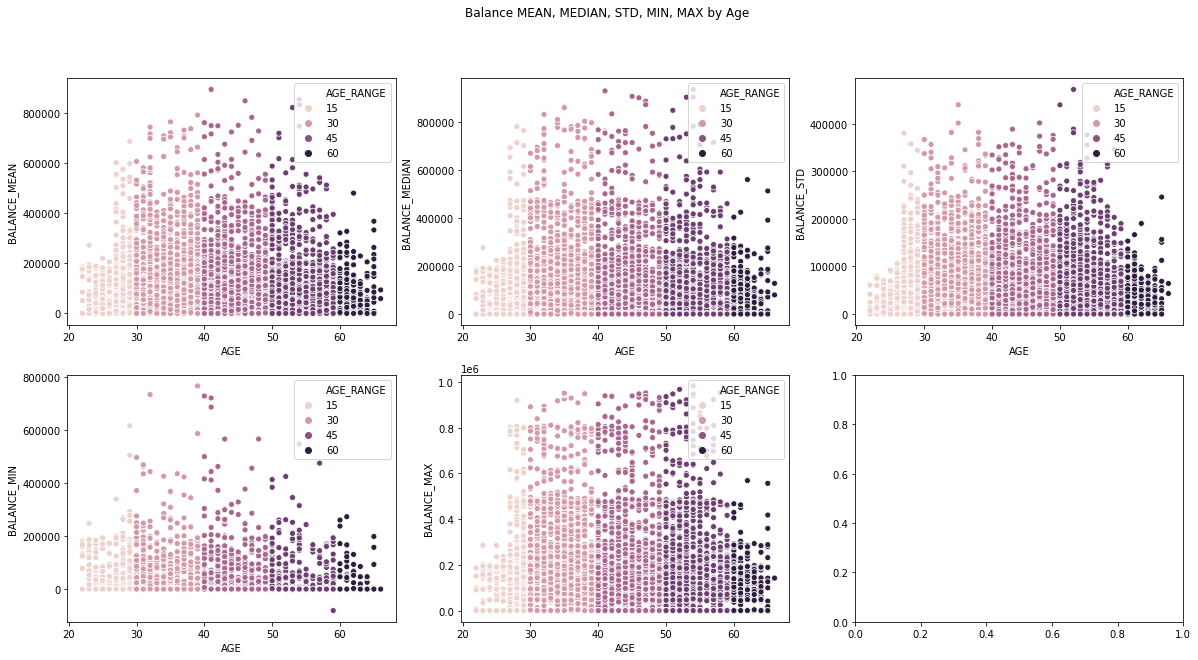

In [32]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

fig.suptitle('Balance MEAN, MEDIAN, STD, MIN, MAX by Age')

sns.scatterplot(ax=axes[0, 0], x="AGE", y="BALANCE_MEAN", hue="AGE_RANGE", data=payment_difficulties)
sns.scatterplot(ax=axes[0, 1], x="AGE", y="BALANCE_MEDIAN", hue="AGE_RANGE", data=payment_difficulties)
sns.scatterplot(ax=axes[0, 2], x="AGE", y="BALANCE_STD", hue="AGE_RANGE", data=payment_difficulties)
sns.scatterplot(ax=axes[1, 0], x="AGE", y="BALANCE_MIN", hue="AGE_RANGE", data=payment_difficulties)
sns.scatterplot(ax=axes[1, 1], x="AGE", y="BALANCE_MAX", hue="AGE_RANGE", data=payment_difficulties)
None

> The clients under 30 and over 60 have less money in general, but the range 30 to 60 is stable with higher balances. Therefore, the balance alone is not a good indicator for payment difficulties. The clients in their 30s may have more money than in their 20s, but certainly have also much more expenses.

- Now, for the relationship between the number of credits and balance, with age range as hue:

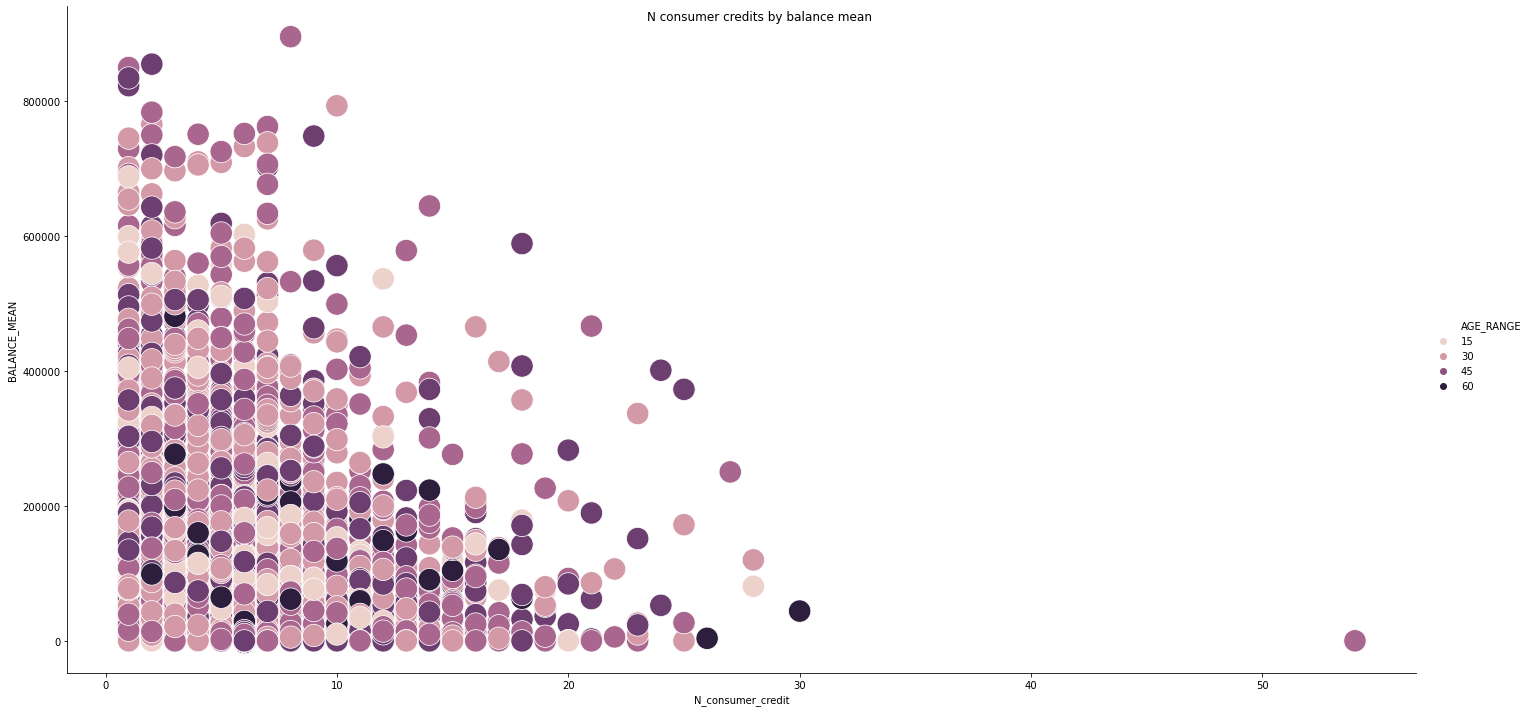

In [33]:
g = sns.relplot(x="N_consumer_credit", y="BALANCE_MEAN", hue="AGE_RANGE", data=payment_difficulties, s=500, height=10, aspect=2/1)
g.fig.suptitle("N consumer credits by balance mean")
None

> The balance mean decreases significantly with the number of consumer credit. However, age is not a strong factor.

- And now, we plot the unitary debt and credit (debt or credit / number of consumer credit) by the normalized balance (max balance / mean balance): (These indicators are chosen for visual clarity.)

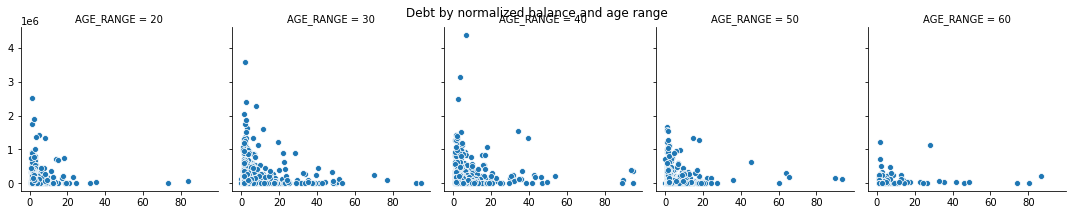

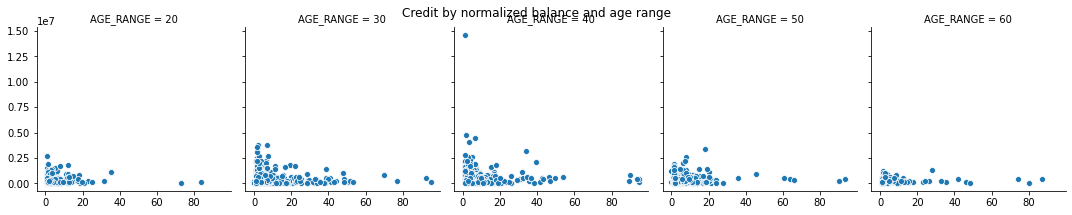

In [34]:
g = sns.FacetGrid(data=pd.DataFrame({
                "BALANCE_NORM": payment_difficulties["BALANCE_MAX"] / payment_difficulties["BALANCE_MEAN"],
                "AGE_RANGE": payment_difficulties["AGE_RANGE"],
                "DEBT": (payment_difficulties["AMT_CREDIT_SUM_DEBT"] / payment_difficulties["N_consumer_credit"])
            }), col="AGE_RANGE")
g.map_dataframe(sns.scatterplot,x="BALANCE_NORM",y="DEBT")
g.fig.suptitle("Debt by normalized balance and age range")
None

g = sns.FacetGrid(data=pd.DataFrame({
                "BALANCE_NORM": payment_difficulties["BALANCE_MAX"] / payment_difficulties["BALANCE_MEAN"],
                "AGE_RANGE": payment_difficulties["AGE_RANGE"],
                "CREDIT": (payment_difficulties["AMT_CREDIT_SUM"] / payment_difficulties["N_consumer_credit"]) 
            }), col="AGE_RANGE")
g.map_dataframe(sns.scatterplot,x="BALANCE_NORM",y="CREDIT")
g.fig.suptitle("Credit by normalized balance and age range")
None

> It is visible that the more debt a client has, the less money he has. The same pattern is seen for the credit but to a lesser extent, which indicates less correlation. However, once again, no clear correlation with the age appears.

## 6 - Housing and education

- The age hasn't told us much, let's add other comparison factors: education, housing and duration of employment:

In [35]:
payment_difficulties = pd.merge(
    payment_difficulties,
    application[application.TARGET == 1][[
        'SK_ID_CURR', 
        'NAME_EDUCATION_TYPE', 
        'NAME_HOUSING_TYPE', 
        'DAYS_EMPLOYED'
        ]],
    how='left', on='SK_ID_CURR'
).dropna()
len(payment_difficulties)

5875

In [36]:
payment_difficulties.head(10)

,SK_ID_CURR,AGE,AGE_RANGE,N_consumer_credit,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,BALANCE_MEAN,BALANCE_MEDIAN,BALANCE_MIN,BALANCE_MAX,BALANCE_STD,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,DAYS_EMPLOYED
0,100047,48.0,40,3.0,4852134.000,2528203.5,0.000000,0.0000,0.000,0.000,0.000000,Secondary / secondary special,House / apartment,-1262
1,100049,37.0,30,3.0,138767.850,32755.5,48183.296538,10397.1150,0.000,133348.950,54754.919741,Secondary / secondary special,House / apartment,-3597
2,100181,48.0,40,8.0,2090889.000,0.0,0.000000,0.0000,0.000,0.000,0.000000,Secondary / secondary special,House / apartment,-7676
3,100336,38.0,30,10.0,1692333.000,848952.0,278790.244500,326138.2425,0.000,445912.155,126458.668267,Secondary / secondary special,House / apartment,-1350
4,100796,53.0,50,5.0,3148956.000,2583477.0,291423.655312,318364.7850,0.000,466728.975,150907.433436,Secondary / secondary special,House / apartment,-514
5,100816,62.0,60,15.0,896728.095,87511.5,81803.785500,81869.6250,69406.740,96488.145,8778.641826,Secondary / secondary special,House / apartment,365243
6,100839,45.0,40,6.0,823734.000,482629.5,134772.655000,136982.7900,124645.185,140972.715,6124.527302,Secondary / secondary special,House / apartment,-1815
7,100902,60.0,60,7.0,642946.500,0.0,9844.456406,0.0000,0.000,93766.590,23554.790101,Secondary / secondary special,Municipal apartment,365243
8,100963,56.0,50,6.0,1187451.000,116406.0,0.000000,0.0000,0.000,0.000,0.000000,Secondary / secondary special,House / apartment,-395
9,101093,25.0,20,1.0,405000.000,393466.5,0.000000,0.0000,0.000,0.000,0.000000,Secondary / secondary special,House / apartment,-1247


- Now, we make a function to display a chosen column by number of consumer credit and balance mean:

In [37]:
def display_n_consumer_credit_by(column):
    fig, axes = plt.subplots(1, 2, figsize=(20, 10))
    fig.suptitle(f'Balance mean and number of consumer credits by: {column}')

    g = sns.boxplot(ax=axes[0], x=column, y="N_consumer_credit", data=payment_difficulties[payment_difficulties["N_consumer_credit"] <= 10])
    g.set_xticklabels(labels=payment_difficulties[column].unique(), rotation=45)
    None

    h = sns.violinplot(ax=axes[1], x=column, y="BALANCE_MEAN", data=payment_difficulties[payment_difficulties["BALANCE_MEAN"] <= 200000])
    h.set_xticklabels(labels=payment_difficulties[column].unique(), rotation=45)
    None

- We extract the number of credits and the balance mean by housing type:

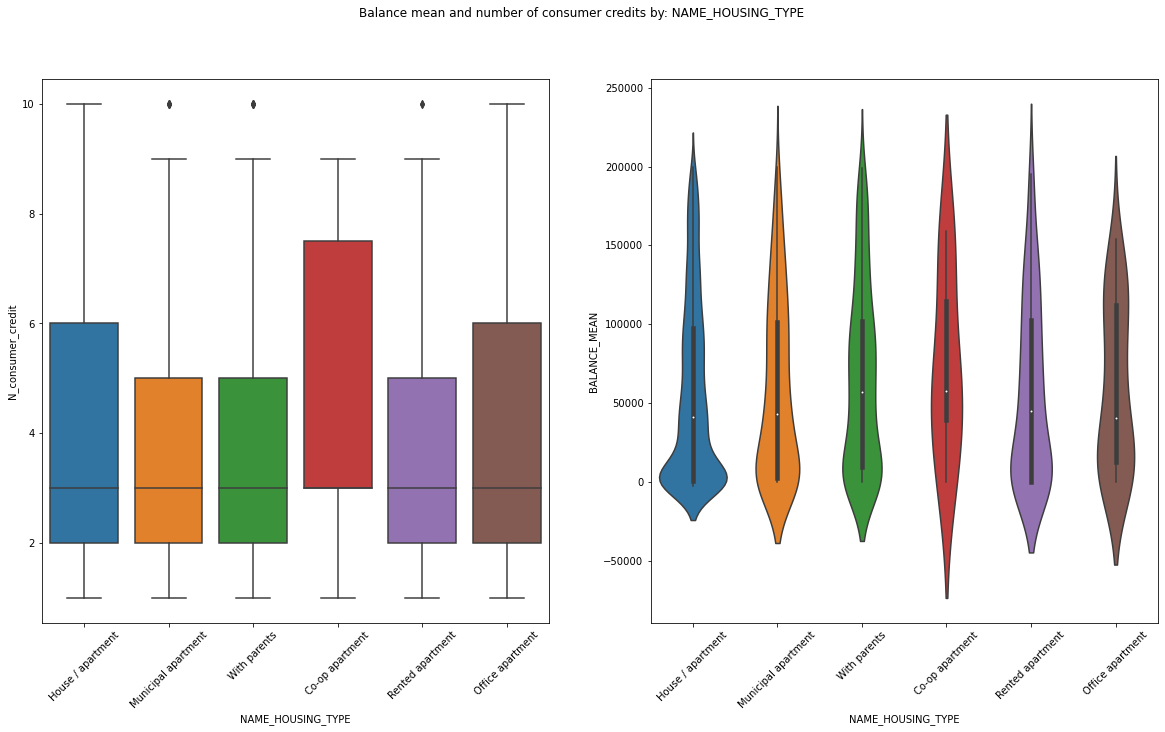

In [38]:
display_n_consumer_credit_by("NAME_HOUSING_TYPE")

- And by education type:

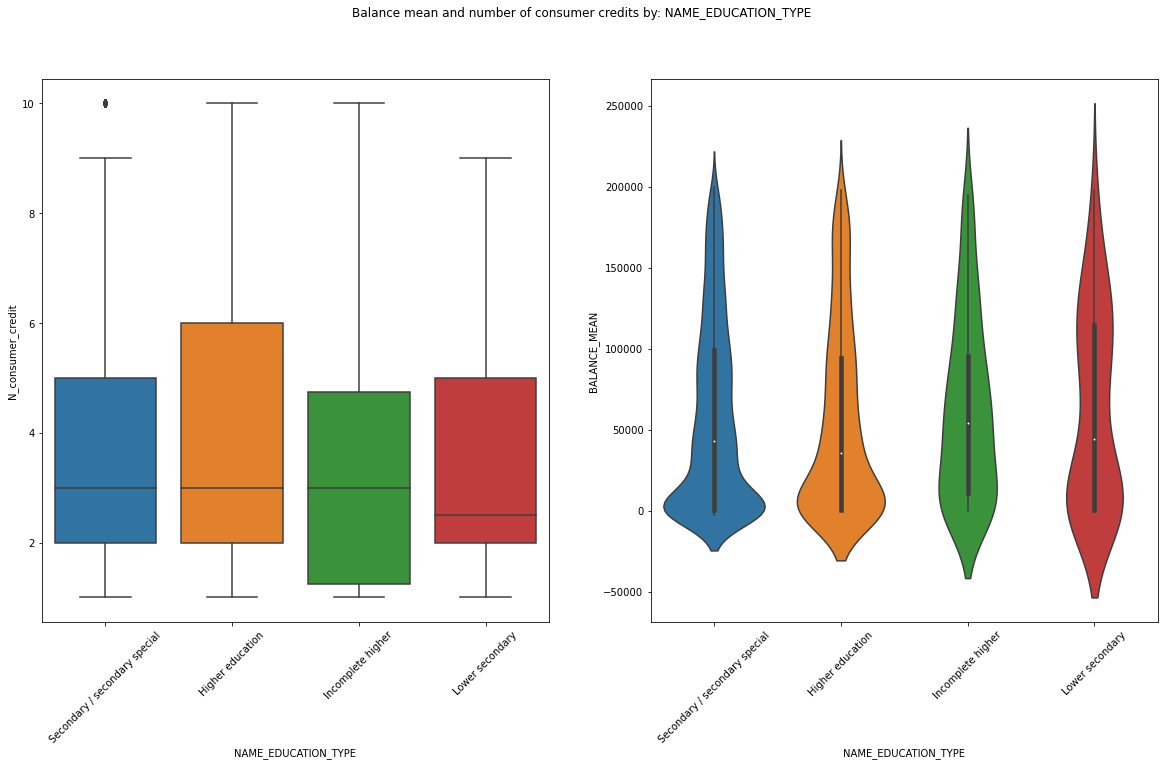

In [39]:
display_n_consumer_credit_by("NAME_EDUCATION_TYPE")

> This is interresting: the clients in co-op apartments are taking more credits and have lower mean balance. And the higher the education, the higher the number of credits taken. Are they the same clients ?

- We will see this with a function to display the distributions of a category and its negation, i.e. everything else, in a chosen column, by balance mean, total debt and total credit:

In [40]:
def display_comp_categ_notcateg(column, categ):
    fig, axes = plt.subplots(3, 1, figsize=(20, 10))
    plt.suptitle(f"BALANCE, DEBT and CREDIT distributions for {column} by {categ} and NOT_{categ}")
    sns.kdeplot(
        ax=axes[0],
        data=pd.DataFrame({categ: 
                           payment_difficulties[payment_difficulties[column] == categ]['BALANCE_MEAN']
                          })[categ],
        linewidth=5
    )
    sns.kdeplot(
        ax=axes[0],
        data=pd.DataFrame({f"NOT_{categ}": 
                           payment_difficulties[payment_difficulties[column] != categ]['BALANCE_MEAN']
                          })[f"NOT_{categ}"],
        linewidth=3
    )
    
    sns.kdeplot(
        ax=axes[1],
        data=pd.DataFrame({categ: 
                           payment_difficulties[payment_difficulties[column] == categ]['AMT_CREDIT_SUM_DEBT']
                          })[categ],
        linewidth=5
    )
    sns.kdeplot(
        ax=axes[1],
        data=pd.DataFrame({f"NOT_{categ}": 
                           payment_difficulties[payment_difficulties[column] != categ]['AMT_CREDIT_SUM_DEBT']
                          })[f"NOT_{categ}"],
        linewidth=3
    )
    
    sns.kdeplot(
        ax=axes[2],
        data=pd.DataFrame({categ: 
                           payment_difficulties[payment_difficulties[column] == categ]['AMT_CREDIT_SUM']
                          })[categ],
        linewidth=5
    )
    sns.kdeplot(
        ax=axes[2],
        data=pd.DataFrame({f"NOT_{categ}": 
                           payment_difficulties[payment_difficulties[column] != categ]['AMT_CREDIT_SUM']
                          })[f"NOT_{categ}"],
        linewidth=3
    )
    
    axes[0].set_title('BALANCE')
    axes[1].set_title('DEBT')
    axes[2].set_title('CREDIT')
    None

- Co-op apartment and NOT co-op apartment distributions, by balance mean, total debt and total credit:

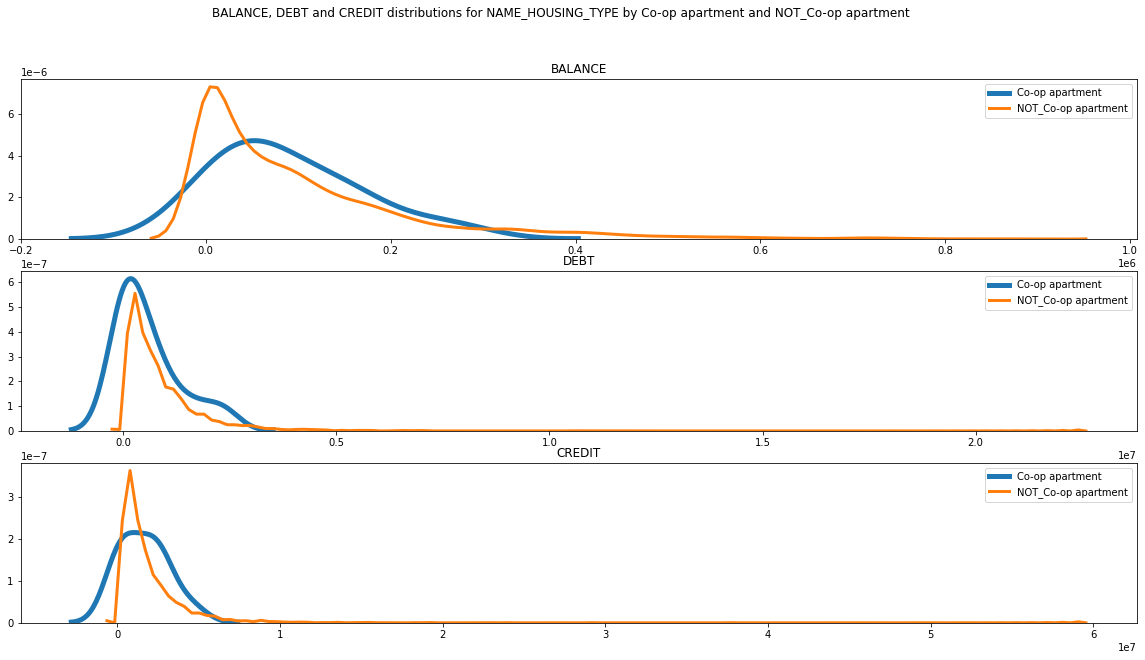

In [41]:
display_comp_categ_notcateg("NAME_HOUSING_TYPE", "Co-op apartment")

- Higher education and NOT higher education distributions, by balance mean, total debt and total credit:

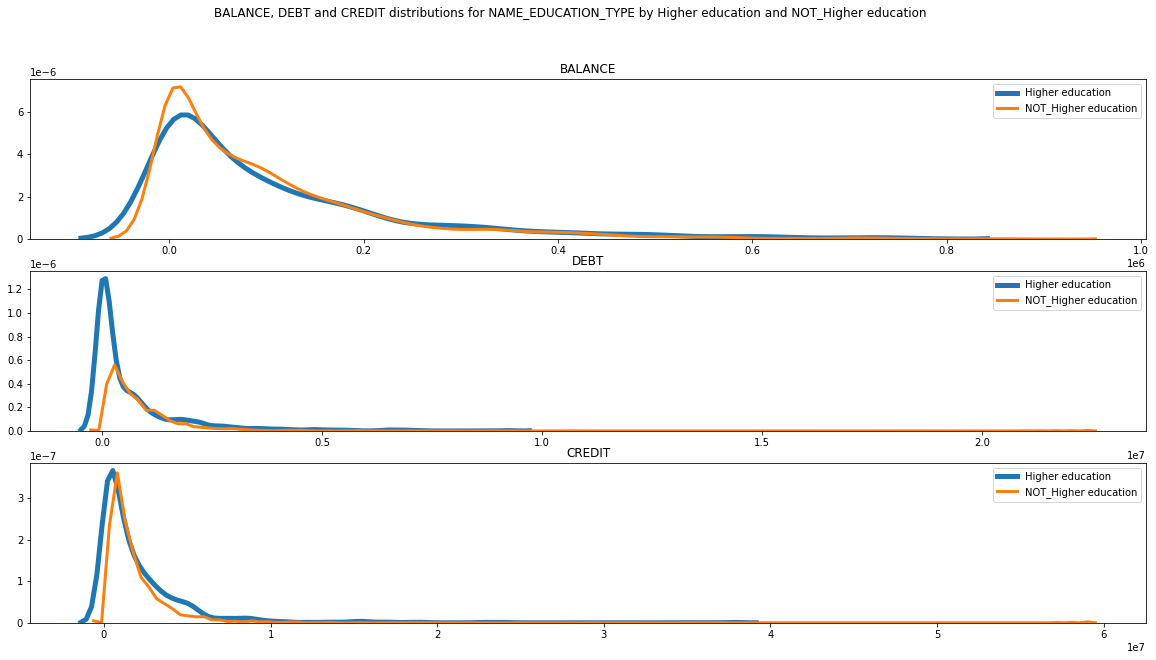

In [42]:
display_comp_categ_notcateg("NAME_EDUCATION_TYPE", "Higher education")

> Both mean balances are lower, but for different reasons. The clients living in co-op apartments have average debts but higher credits, while clients with higher educations have higher debts but average credits. We can assume that they are different types of clients.

- To verify this, we cross their data:

In [43]:
len(payment_difficulties[(payment_difficulties["NAME_EDUCATION_TYPE"] == "Higher education") & (payment_difficulties["NAME_HOUSING_TYPE"] == "Co-op apartment")])

4

> Only 4 clients with payment difficulties are both living in a co-op apartment and have a higher education. They are indeed different types of clients.

## 7 - Duration of employment

- We convert the duration of employed from days to years for readability:

In [44]:
payment_difficulties.loc[payment_difficulties["DAYS_EMPLOYED"] > 0, 'DAYS_EMPLOYED'] = 0
payment_difficulties['YEARS_EMPLOYED'] = abs(payment_difficulties['DAYS_EMPLOYED'] / 365)
payment_difficulties = payment_difficulties.round({'YEARS_EMPLOYED': 0})
payment_difficulties['YEARS_EMPLOYED'].head(10)

0     3.0
1    10.0
2    21.0
3     4.0
4     1.0
5     0.0
6     5.0
7     0.0
8     1.0
9     3.0
Name: YEARS_EMPLOYED, dtype: float64

- We display the distribution for the duration of employement of clients with payment difficulties in years:

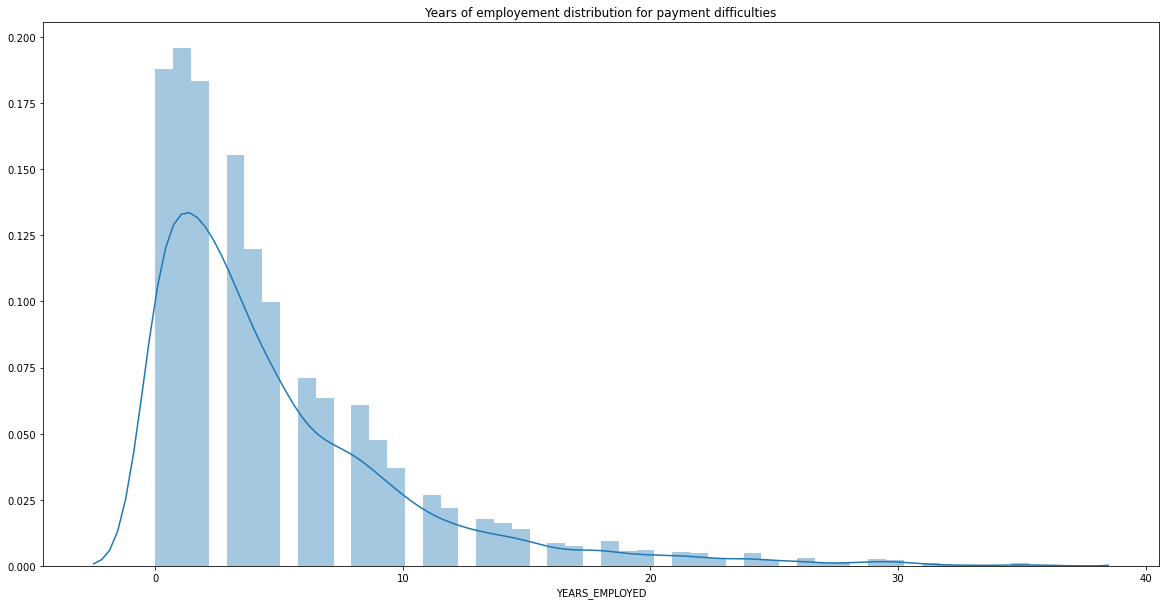

In [45]:
plt.figure(figsize=(20, 10))
plt.title('Years of employement distribution for payment difficulties')
sns.distplot(payment_difficulties["YEARS_EMPLOYED"])
None

> We see that the majority of client with payment difficulties are employed for less than 5 years.

- And display the density of employment durations of clients with payment difficulties by age ranges:

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:690: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


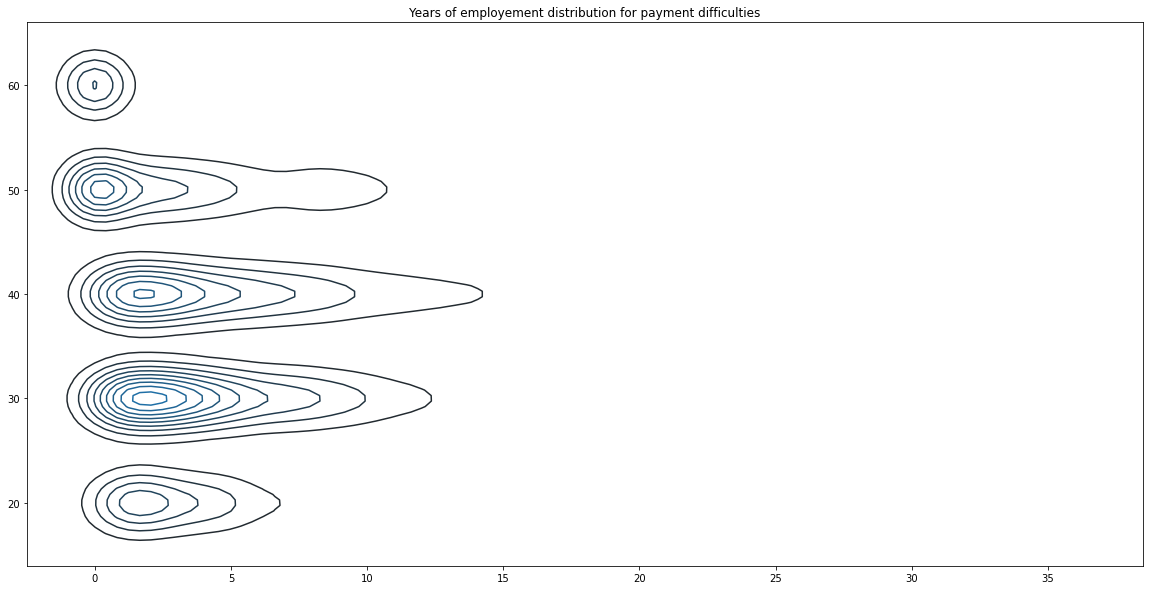

In [46]:
plt.figure(figsize=(20, 10))
plt.title('Years of employement distribution for payment difficulties')
sns.kdeplot(data=payment_difficulties[['YEARS_EMPLOYED', 'AGE_RANGE']])
None

> The majority of clients with payment difficulties are employed for less than 5 years among all ages. This indicates that clients with payment difficulties are prone to employment difficulties and instabilities, as the duration of the last employment does not increase with age.

## 8 - Saving the dataframe as an SQL table

- For further analysis, we save the dataframe as an SQL table to data/Payment_difficulties.db:

In [47]:
if os.path.exists("data/Payment_difficulties.db"):
    os.remove("data/Payment_difficulties.db")

conn = sqlite3.connect('data/Payment_difficulties.db')
c = conn.cursor()

c.execute('CREATE TABLE PAYMENT_DIFFICULTIES ( \
          SK_ID_CURR, \
          AGE, \
          AGE_RANGE, \
          N_consumer_credit, \
          AMT_CREDIT_SUM, \
          AMT_CREDIT_SUM_DEBT, \
          BALANCE_MEAN, \
          BALANCE_MEDIAN, \
          BALANCE_MIN, \
          BALANCE_MAX, \
          BALANCE_STD, \
          NAME_EDUCATION_TYPE, \
          NAME_HOUSING_TYPE, \
          DAYS_EMPLOYED, \
          YEARS_EMPLOYED \
         )')
conn.commit()

payment_difficulties.to_sql('PAYMENT_DIFFICULTIES', conn, if_exists='replace', index = False)

- And we test the newly created SQL database with an example:

In [48]:
pd.read_sql(
    "SELECT AGE, N_consumer_credit, AMT_CREDIT_SUM_DEBT, BALANCE_MEAN, \
    NAME_EDUCATION_TYPE, NAME_HOUSING_TYPE, YEARS_EMPLOYED \
    FROM PAYMENT_DIFFICULTIES \
    WHERE N_consumer_credit > 10 AND AGE_RANGE = 30 \
    ORDER BY YEARS_EMPLOYED DESC LIMIT 10",
    conn)

,AGE,N_consumer_credit,AMT_CREDIT_SUM_DEBT,BALANCE_MEAN,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,YEARS_EMPLOYED
0,39.0,14.0,2308122.000,60224.607947,Secondary / secondary special,House / apartment,20.0
1,38.0,17.0,462555.585,3915.091484,Secondary / secondary special,House / apartment,19.0
2,37.0,14.0,1362077.370,5308.226250,Secondary / secondary special,House / apartment,18.0
3,37.0,16.0,12109.500,0.000000,Higher education,House / apartment,18.0
4,39.0,13.0,35482.500,0.000000,Secondary / secondary special,House / apartment,18.0
5,38.0,18.0,1218870.000,6445.040625,Secondary / secondary special,House / apartment,17.0
6,35.0,16.0,351986.715,0.000000,Secondary / secondary special,House / apartment,17.0
7,37.0,11.0,1987501.635,37846.999432,Secondary / secondary special,House / apartment,17.0
8,38.0,11.0,193149.000,0.000000,Secondary / secondary special,House / apartment,15.0
9,38.0,20.0,1391775.795,0.000000,Secondary / secondary special,House / apartment,15.0


# SUMMARY

> To sum up this data analysis on clients with payment difficulties:
- The majority have a cash loan, a secondary education, are living in a house or apartment, and / or are married.
- Age is the most correlated factor to payment difficulties.
- A profile of the hypothetical client being the most likely to have payment difficulties has been established.
- The clients in their 30s and 40s are the ones with the most payment difficulties.
- A vast majority of payment difficulties are on consumer credits.
- The balance is not a good indicator for payment difficulties.
- The mean balance decreases with the number of consumer credits.
- There is a strong correlation between high debts and low balances.
- The correlation between credits and balances is less significant.
- Clients living in co-op apartments and clients with higher educations are taking more consumer credits.
- The former have higher credits, whereas the latter have higher debts.
- While having similar payment difficulties, they are not the same clients.
- The majority of clients with payment difficulties are employed for less than 5 years.
- This is true among all age ranges, which implies employment difficulties and instabilities. 